In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import uuid

In [2]:
os.path.isfile("data/caribbean_ports.csv")
caribbean_ports = pd.read_csv("data/caribbean_ports.csv")
os.path.isfile("data/cruise_cancellations.csv")
cruise_cancellations = pd.read_csv("data/cruise_cancellations.csv")
os.path.isfile("data/voyage_options.csv")
voyage_df = pd.read_csv("data/voyage_options.csv")
os.path.isfile("data/cruise_pics.csv")
ab_pics = pd.read_csv('data/cruise_pics.csv')

## **I. Summary Stats**

### **Dataset Summary**

In [3]:
caribbean_ports.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


In [4]:
caribbean_ports.head(5)

,port_id,port_name,country_or_territory,region,port_type,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
0,1,Cozumel,Mexico,Western,Private,23.7406,-66.7748,187848,13.75,6,8.23,2,0.82,175.22,0.99
1,2,Costa Maya,Mexico,Western,Eco/Nature,13.4943,-65.7182,667075,13.77,3,9.74,10,0.52,100.07,0.78
2,3,Progreso,Mexico,Western,Major,18.9991,-83.1489,177948,12.11,9,8.78,3,0.69,156.40,0.44
3,4,Belize City,Belize,Western,Private,20.3673,-76.0384,452690,4.53,4,12.50,1,0.81,157.05,0.18
4,5,Roatán,Honduras,Western,Private,10.8129,-82.1033,549046,17.20,1,6.39,8,0.75,43.05,0.80


### **Handling Missing Data and Impossible Values**

In [5]:
print(caribbean_ports.isna().sum().sort_values(ascending=False))

port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [6]:
# Check for invalid avg_port_fee_usd
print(caribbean_ports[caribbean_ports['avg_port_fee_usd'] < 0])

# Check for invalid local_attractions_score
print(caribbean_ports[(caribbean_ports['local_attractions_score'] < 1) | (caribbean_ports['local_attractions_score'] > 10)])

# Check for invalid avg_customer_satisfaction
print(caribbean_ports[(caribbean_ports['avg_customer_satisfaction'] < 1) | (caribbean_ports['avg_customer_satisfaction'] > 10)])

# Check for invalid avg_disembark_rate
print(caribbean_ports[(caribbean_ports['avg_disembark_rate'] < 0) | (caribbean_ports['avg_disembark_rate'] > 1)])

# Check for invalid avg_shore_spend_per_passenger
print(caribbean_ports[caribbean_ports['avg_shore_spend_per_passenger'] < 0])

    port_id port_name country_or_territory   region port_type  latitude  \
21       22   Antigua  Antigua and Barbuda  Eastern     Major   15.4549   

    longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
21   -71.9317               815313              -3.5                        3   

    avg_customer_satisfaction  excursion_variety_index  avg_disembark_rate  \
21                       9.19                        9                0.95   

    avg_shore_spend_per_passenger  seasonality_score  
21                          82.52               0.88  
    port_id   port_name country_or_territory   region port_type  latitude  \
15       16  St. Thomas    US Virgin Islands  Eastern     Major   12.1357   

    longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
15   -82.0101               489792             14.75                       15   

    avg_customer_satisfaction  excursion_variety_index  avg_disembark_rate  \
15                     

In [7]:
def clean_group_mean(df, column, valid_min, valid_max):
    valid = df[(df[column] >= valid_min) & (df[column] <= valid_max)]
    return valid.groupby('country_or_territory')[column].transform('mean')

# 1. avg_port_fee_usd (should be >= 0)
mask = caribbean_ports['avg_port_fee_usd'] < 0
valid_means = clean_group_mean(caribbean_ports, 'avg_port_fee_usd', 0, float('inf'))
caribbean_ports.loc[mask, 'avg_port_fee_usd'] = valid_means[mask]

# 2. local_attractions_score (1–10)
mask = (caribbean_ports['local_attractions_score'] < 1) | (caribbean_ports['local_attractions_score'] > 10)
valid_means = clean_group_mean(caribbean_ports, 'local_attractions_score', 1, 10)
caribbean_ports.loc[mask, 'local_attractions_score'] = valid_means[mask]

# 3. avg_customer_satisfaction (1–10)
mask = (caribbean_ports['avg_customer_satisfaction'] < 1) | (caribbean_ports['avg_customer_satisfaction'] > 10)
valid_means = clean_group_mean(caribbean_ports, 'avg_customer_satisfaction', 1, 10)
caribbean_ports.loc[mask, 'avg_customer_satisfaction'] = valid_means[mask]

# 4. avg_disembark_rate (0–1)
mask = (caribbean_ports['avg_disembark_rate'] < 0) | (caribbean_ports['avg_disembark_rate'] > 1)
valid_means = clean_group_mean(caribbean_ports, 'avg_disembark_rate', 0, 1)
caribbean_ports.loc[mask, 'avg_disembark_rate'] = valid_means[mask]

# 5. avg_shore_spend_per_passenger (>= 0)
mask = caribbean_ports['avg_shore_spend_per_passenger'] < 0
valid_means = clean_group_mean(caribbean_ports, 'avg_shore_spend_per_passenger', 0, float('inf'))
caribbean_ports.loc[mask, 'avg_shore_spend_per_passenger'] = valid_means[mask]

In [8]:
caribbean_ports.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,49.000000,49.000000,49.000000,50.000000,49.000000,49.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.996122,4.224490,8.110408,5.980000,0.755102,116.116531,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.081090,2.451745,1.120417,3.040475,0.154773,54.980235,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,3.090000,1.000000,6.120000,1.000000,0.510000,26.900000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.960000,2.000000,7.350000,4.000000,0.640000,76.310000,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.110000,4.000000,8.230000,6.000000,0.790000,121.170000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.520000,6.000000,8.960000,9.000000,0.890000,163.530000,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,9.000000,9.960000,10.000000,1.000000,197.660000,0.990000


During the data validation process, no missing (null) values were found across any columns in the caribbean_ports dataset. However, upon further inspection using summary statistics, several variables contained impossible values outside their expected ranges, such as negative port fees, customer satisfaction scores above 10, and disembarkation rates exceeding 1. To address these issues, invalid entries were imputed by replacing them with the mean of valid values from the same country_or_territory. This ensured that the corrections respected the appropriate business logic while maintaining consistency within each country group.

### **Insights**

In [9]:
region_visitors = caribbean_ports.groupby('region')['avg_annual_visitors'].mean()
print(region_visitors)

region
Bahamas     693904.875000
Eastern     766951.812500
Southern    812553.545455
Western     569725.000000
Name: avg_annual_visitors, dtype: float64


Ports in the Southern Caribbean attract the highest average number of annual visitors (over 812,000), followed by the Eastern Caribbean. In contrast, the Bahamas and Western regions receive significantly fewer visitors on average.

In [10]:
port_type_spend = caribbean_ports.groupby('port_type')['avg_shore_spend_per_passenger'].mean()
print(port_type_spend)

port_type
Boutique      119.862727
Eco/Nature    117.466875
Major         123.653000
Private       104.601667
Name: avg_shore_spend_per_passenger, dtype: float64


Passengers tend to spend the most at Major ports (123.65 USD on average), followed closely by Boutique and Eco/Nature ports. Private ports show the lowest average shore spending at about 93.09 USD per passenger.

In [11]:
pivot_cust_sat = caribbean_ports.pivot_table(values='avg_customer_satisfaction', index='region', columns='port_type', aggfunc='mean')
print(pivot_cust_sat)

port_type  Boutique  Eco/Nature   Major   Private
region                                           
Bahamas    9.205000         NaN  6.5600  8.414000
Eastern    8.386667    8.638333  7.9740  8.105000
Southern   7.817500    7.804000     NaN  8.585000
Western    7.755000    7.810000  8.5375  7.043333


Customer satisfaction is highest at Boutique ports across all regions, especially in the Bahamas with an average score of 9.21. Major ports generally receive lower satisfaction scores compared to Boutique and Private ports. The missing values in the pivot table occur because there are no Eco/Nature ports in the Bahamas and no Major ports in the Southern region.

In [12]:
top_satisfaction = caribbean_ports[['country_or_territory', 'avg_customer_satisfaction']].sort_values(by='avg_customer_satisfaction', ascending=False).head(5)
print(top_satisfaction)

      country_or_territory  avg_customer_satisfaction
6                 Honduras                       9.96
1                   Mexico                       9.74
18  British Virgin Islands                       9.65
25                 Grenada                       9.56
9                  Bahamas                       9.51


Honduras stands out with the highest average customer satisfaction score (9.96), followed by Mexico, the British Virgin Islands, Grenada, and the Bahamas, all with scores above 9.5. These ports appear to offer the most positive experiences for cruise passengers.

In [13]:
top_attractions = caribbean_ports[['port_name', 'country_or_territory', 'local_attractions_score']] \
    .sort_values(by='local_attractions_score', ascending=False) \
    .head(5)

print(top_attractions)

        port_name country_or_territory  local_attractions_score
2        Progreso               Mexico                      9.0
37   Port Antonio              Jamaica                      9.0
10  Half Moon Cay              Bahamas                      8.0
39      Cabo Rojo          Puerto Rico                      8.0
9          Bimini              Bahamas                      8.0


Progreso and Port Antonio stand out with the highest local attractions scores (9.0), followed closely by Half Moon Cay, St. Lucia, and Bimini with scores of 8.0. This suggests these ports offer a broader range of attractions compared to other Caribbean destinations.

In [14]:
country_summary = caribbean_ports.groupby('country_or_territory').agg(
    total_annual_visitors=('avg_annual_visitors', 'sum'),
    avg_customer_satisfaction=('avg_customer_satisfaction', 'mean')
).reset_index()

country_summary = country_summary.sort_values(by='avg_customer_satisfaction', ascending=False)

print(country_summary)

      country_or_territory  total_annual_visitors  avg_customer_satisfaction
6   British Virgin Islands                1555934                   9.560000
11                 Grenada                 831239                   9.560000
22       US Virgin Islands                 579145                   9.240000
0      Antigua and Barbuda                 815313                   9.190000
3                 Barbados                 790976                   9.180000
15                  Mexico                1032871                   8.916667
20               St. Lucia                 641460                   8.810000
9                 Dominica                 466880                   8.600000
4                   Belize                 953959                   8.460000
2                  Bahamas                5551239                   8.380000
1                    Aruba                 275281                   8.310000
13                Honduras                1790048                   8.280000

British Virgin Islands and Grenada report the highest average customer satisfaction scores, each achieving 9.56. Despite not having the highest visitor volumes, these destinations offer experiences that passengers rate extremely highly. In contrast, larger markets such as the Dominican Republic and Venezuela attract significant numbers of visitors but show noticeably lower satisfaction levels, suggesting that higher traffic does not always translate into better passenger experiences.

### **Findings**

The exploratory analysis indicates that cruise passengers are most attracted to ports offering a combination of strong local attractions and specialized experiences, such as Boutique ports. Regions with higher visitor volumes, like the Southern and Eastern Caribbean, do not necessarily correlate with higher customer satisfaction, suggesting that passenger experience is more closely tied to port characteristics than to overall traffic. Ports classified as Major drive the highest shore spending, yet their satisfaction scores tend to be lower compared to Boutique and Private ports, highlighting a potential trade-off between economic gain and visitor experience. At the country level, smaller territories such as the British Virgin Islands and Grenada report the highest customer satisfaction scores, while larger markets like the Dominican Republic and Venezuela show noticeably lower ratings. Furthermore, the identification and correction of invalid data ensured that conclusions were based on consistent and realistic figures. The results suggest that enhancing local attractions and improving specialized experiences could be more effective strategies for ports aiming to increase both visitor satisfaction and economic impact. However, it is important to note that the dataset had some initial inconsistencies, including impossible values for several key variables, which required careful correction. In addition, not all region and port type combinations were represented, potentially limiting the generalizability of some findings across the broader Caribbean cruise market.

Based on the data, Lobster Land should prioritize partnering with or operating in Boutique ports, as they consistently receive the highest customer satisfaction scores across all regions. Although Major ports attract higher spending per passenger, Boutique ports strike a balance between strong spending and a superior passenger experience—an important factor for brand positioning. The Bahamas and Eastern Caribbean also stand out as attractive regions due to high visitor volumes and strong satisfaction scores. Additionally, ports like Progreso and Port Antonio, with top local attractions scores, suggest strong tourism value and engagement opportunities. Focusing on high-satisfaction, mid-to-high-spend destinations will help Lobster Land deliver a premium yet enjoyable cruise experience from day one.

## **II. Segmentation and Targeting**

### **Data Loading and Exploration**

In [15]:
df = pd.read_csv('data/caribbean_ports.csv')
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [16]:
# Remove impossible values
df = df[df['avg_annual_visitors'] >= 0]
df = df[df['avg_port_fee_usd'] >= 0]
df = df[df['avg_shore_spend_per_passenger'] >= 0]
df = df[(df['avg_customer_satisfaction'] >= 1) & (df['avg_customer_satisfaction'] <= 10)]
df = df[(df['local_attractions_score'] >= 1) & (df['local_attractions_score'] <= 10)]
df = df[(df['avg_disembark_rate'] >= 0) & (df['avg_disembark_rate'] <= 1)]

In [17]:
# Summary statistics for numeric variables
numeric_cols = [
    'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score',
    'avg_customer_satisfaction', 'excursion_variety_index', 'avg_disembark_rate',
    'avg_shore_spend_per_passenger', 'seasonality_score', 'latitude', 'longitude'
]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

print("\nSummary Statistics for Numeric Variables after Cleaning:")
df[numeric_cols].describe()


Summary Statistics for Numeric Variables after Cleaning:


,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score,latitude,longitude
count,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,7.345383e+05,11.390222,4.155556,8.076889,6.022222,0.753556,113.094444,0.567556,18.673378,-72.370378
std,4.626601e+05,4.916183,2.485920,1.114352,2.927059,0.154068,55.055792,0.276793,5.589324,7.445726
min,7.195900e+04,3.090000,1.000000,6.120000,1.000000,0.510000,26.900000,0.110000,10.096600,-84.364500
25%,2.752810e+05,6.850000,2.000000,7.350000,4.000000,0.640000,50.020000,0.350000,13.477500,-79.280000
50%,7.909760e+05,12.330000,4.000000,8.170000,6.000000,0.770000,113.420000,0.570000,18.999100,-71.516400
75%,1.070545e+06,14.520000,6.000000,8.810000,9.000000,0.890000,163.180000,0.780000,23.740600,-65.725800
max,1.492646e+06,18.920000,9.000000,9.960000,10.000000,1.000000,197.660000,0.990000,27.270500,-61.757600


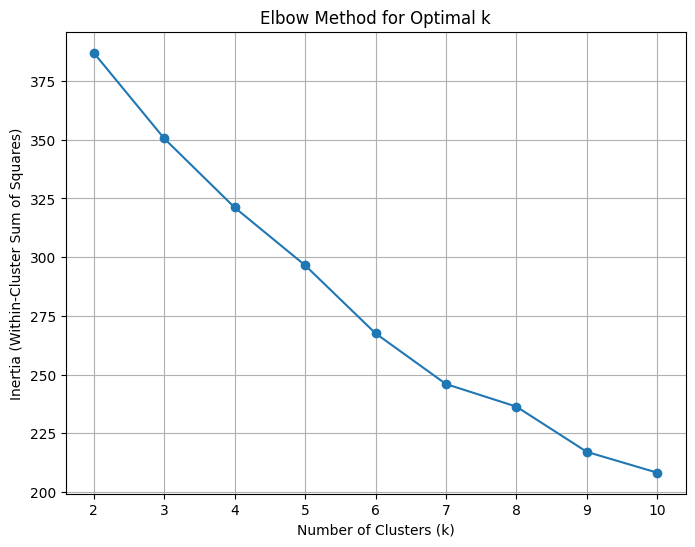

In [18]:
# Elbow Method to find optimal k
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

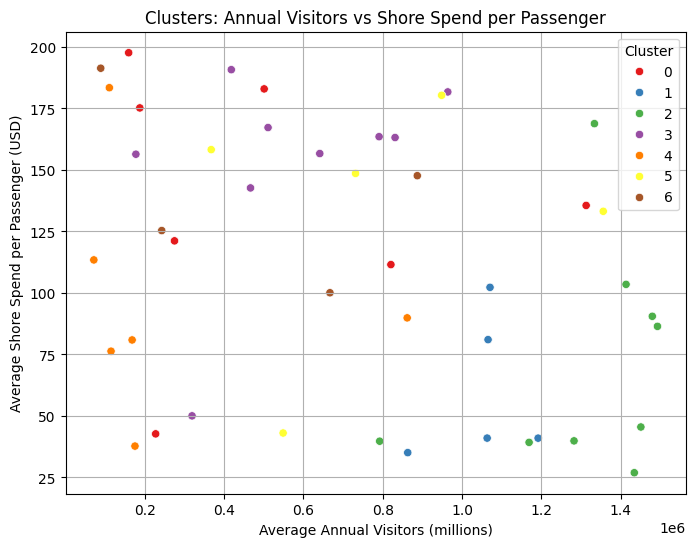

In [19]:
final_kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set1', data=df)
plt.title('Clusters: Annual Visitors vs Shore Spend per Passenger')
plt.xlabel('Average Annual Visitors (millions)')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

*As per the elbow chart, the optimal value seems to be 7, but after our scatter plot of the cluster, the plots didn't seems to occupy these many clusters, as we can see the cluster 6 isn't able to show these many data points to so some analysis on that. hence, for this analysis, we will be using k as 6.*

In [20]:
final_kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

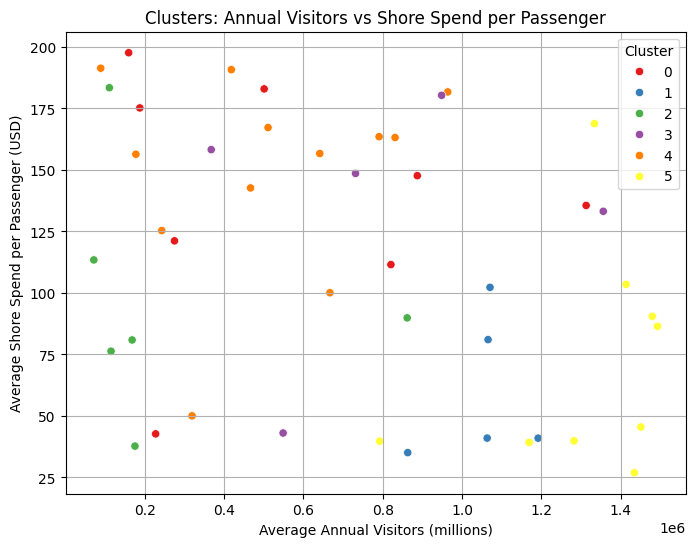

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set1', data=df)
plt.title('Clusters: Annual Visitors vs Shore Spend per Passenger')
plt.xlabel('Average Annual Visitors (millions)')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### **Analysis on the Clusters**
**Cluster 0 (Red):**
- ***Position:** Mostly in the upper-left quadrant, with a few points extending toward the middle.*
- ***Visitor Range:** 0.2 to 0.6 million, with one outlier at ~0.8 and one at 1.3 million.*
- ***Shore Spend Range:** 125 to 200 USD, with most points above 100 USD.*
- ***Insights:** This cluster has low visitor numbers but very high shore spend, indicating exclusive, high-end destinations. These ports likely cater to affluent travelers willing to spend significantly on shore experiences, fitting well with a luxury cruise line. The low visitor volume suggests less crowded ports, enhancing the exclusivity.*

**Cluster 1 (Blue):**
- ***Position:** Concentrated in the bottom-right.*
- ***Visitor Range:** 0.8 to 1.2 million.*
- ***Shore Spend Range:** 50 to 75 USD, with most points around 50 USD and one outlier near 100 USD.*
- ***Insights:**  TThese are mass-market destinations with substantial foot traffic but lower per-passenger spending. Suitable for budget-friendly cruises or those aiming to upsell shore excursions to increase revenue.*
  
**Cluster 2 (Green):**
- ***Position:** Scattered in the lower-left.*
- ***Visitor Range:** near 0.2 million*
- ***Shore Spend Range**: 25 to 100 USD, with most points around 25 to 50 USD.*
- ***Insights:** These are smaller, less crowded ports with moderate spending, not high-traffic tourist spots*

**Cluster 3 (Purple):**
- ***Position:** Mostly in the upper middle.*
- ***Visitor Range:** 0.2 to 0.8 million*
- ***Shore Spend Range:** 150 to 175 USD, with most points around 150 USD.*
- ***Insights:** hese are emerging luxury destinations with high spending and moderate visitor numbers, ideal for luxury travelers.*

**Cluster 4 (Orange):**
- ***Position:** Scattered middle to upper-middle*
- ***Visitor Range:** 0.2 to 0.9 million*
- ***Shore Spend Range:** 125 to 200 USD*
- ***Insights:** These ports have low visitor numbers with a wide range of spending behaviors, indicating a mix of underdeveloped or niche destinations.*

**Cluster 5 (Yellow):**
- ***Position:** Scattered across bottom right*
- ***Visitor Range:** 0.8 to 1.6 million, with most points between 1.2and 1.6 million.*
- ***Shore Spend Range**:  25 to 100 USD*
- ***Insights:** This cluster has higher visitor numbers and very low spend, indicating that visitors are budget friendly.*


### **Clustering Name as per the Cluster Analysis**

**Cluster 0 (Red): Elite Coastal Gems**
- *Reflects the exclusive, high-end destinations with low visitor numbers (0.2 to 0.6 million, outliers at 0.8 and 1.3 million) and very high shore spend (125 to 200 USD), fitting a luxury cruise line.*
  
**Cluster 1 (Blue): Crowded Budget Ports**
- *Captures the mass-market destinations with substantial foot traffic (0.8 to 1.2 million visitors) and lower per-passenger spending (50 to 75 USD, outlier at 100 USD), suitable for budget-friendly cruises.*
  
**Cluster 2 (Green): Quiet Moderate Ports**
- *Represents smaller, less crowded ports near 0.2 million visitors with moderate spending (25 to 100 USD, mostly 25 to 50 USD), not high-traffic tourist spots.*
  
**Cluster 3 (Purple): Emerging Luxury Retreats**
- *Highlights emerging luxury destinations with high spending (150 to 175 USD) and moderate visitor numbers (0.2 to 0.8 million), ideal for luxury travelers.*
  
**Cluster 4 (Orange): Hidden Mixed-Tier Stops**
- *Reflects ports with low visitor numbers (0.2 to 0.9 million) and a wide range of spending behaviors (125 to 200 USD), indicating a mix of underdeveloped or niche destinations.*

**Cluster 5 (Yellow): Mass-Market Hotspots**
- *Describes budget-friendly destinations with higher visitor numbers (0.8 to 1.6 million, mostly 1.2 to 1.6 million) and very low spend (25 to 100 USD), indicating budget-friendly visitors.*

In [22]:
cluster_names = {
    0: 'Elite Coastal Gems',
    1: 'Crowded Budget Ports',
    2: 'Quiet Moderate Ports',
    3: 'Emerging Luxury Retreats',
    4: 'Hidden Mixed-Tier Stops',
    5: 'Mass-Market Hotspots'
}
df['cluster_name'] = df['cluster'].map(cluster_names)


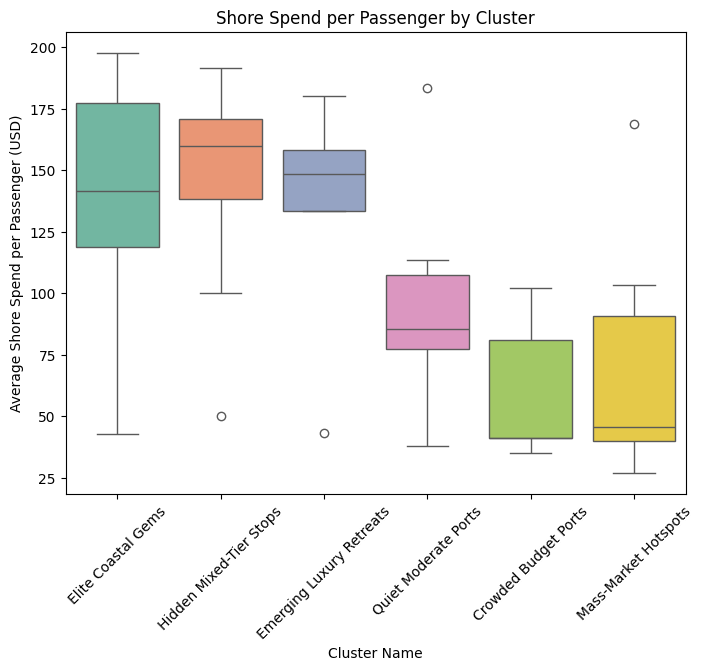

In [23]:
# box plot shore spend per passenger by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_name', y='avg_shore_spend_per_passenger', data=df,
            hue='cluster_name', palette='Set2')
plt.title('Shore Spend per Passenger by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.xticks(rotation=45)
plt.show()

*This boxplot compares shore excursion spending (USD) across 6 named clusters which we have named as per our previous analysis, so here are our analysis on it:*
**Elite Coastal Gems**
- *Highest median shore spend (~$150–175), wide IQR, and some very high outliers, as the passengers spend heavily here — these are **top-tier, high-margin ports**.*
-  ***Ideal for luxury cruise investment**.*
  
**Hidden Mixed-Tier Stops**
- *They also high median spend (~$150) but lesser than Elite Coastal Cluster, but with more variance.*
- *It indicates diverse traveler behaviors, hence, the name is Hidden mixed tier stope as this consists of some luxury spenders, some average.*
- *Ideal for **semi luxury cruise** investment where the spending is not **too high, but the experience is top notch**.*

**Emerging Luxury Retreats**
- *Slightly lower median spending (~$140–150) than other two luxury clusters, with an tight IQR, and shows stable spending habit.*
- *Ideal for **semi-affluent** travelers looking for authenticity and calm.*

**Quiet Moderate Ports**
- *Moderate spend of (~$80 median), but with fewer outliers*
- *They might be mid-tier destinations with limited upscale appeal.*
- *Ideal to offer **bundled packages**, nature/culture excursions to **increase per-passenger yield**.*

**Crowded Budget Ports**
- *It has a Lower median of (~$50–60), and has tight IQR*
- *Decent spending passengers, little revenue upside.*
- *Ideal to **low-cost cruises only**, and to be used for **high volume**of customers.*

**Mass-Market Hotspots**
- *Similar low median (~$40–50), but slightly wider range than the budget cluster.*
- *The budget-oriented port for mass volume with lower spending budget.*
- I*deal for **family with less income** and wants to have a good family time.*

In [24]:
#Bar Plot (Number of Ports per Cluster)
ports_per_cluster = df.groupby('cluster_name').size().reset_index(name='port_count')
print("\nNumber of Ports per Cluster:")
print(ports_per_cluster)


Number of Ports per Cluster:
               cluster_name  port_count
0      Crowded Budget Ports           5
1        Elite Coastal Gems           8
2  Emerging Luxury Retreats           5
3   Hidden Mixed-Tier Stops          12
4      Mass-Market Hotspots           9
5      Quiet Moderate Ports           6


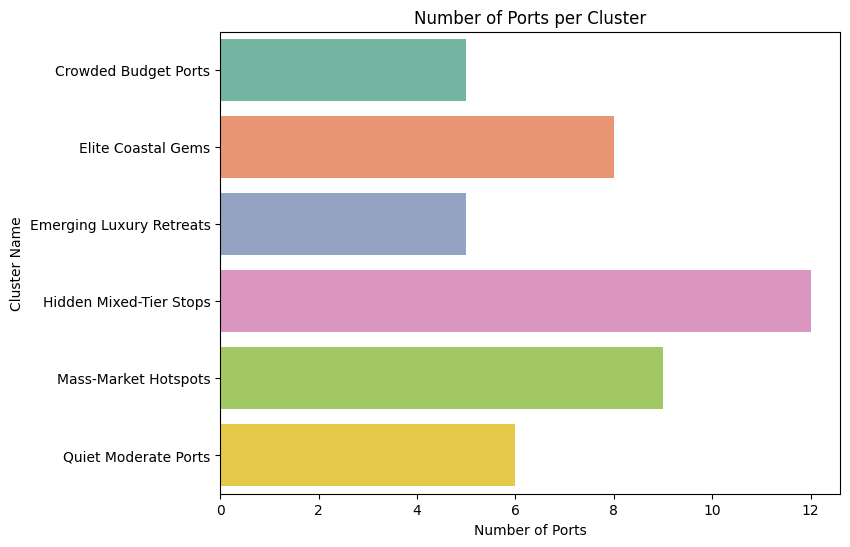

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x='port_count', y='cluster_name', data=ports_per_cluster, hue='cluster_name', palette='Set2')
plt.title('Number of Ports per Cluster')
plt.xlabel('Number of Ports')
plt.ylabel('Cluster Name')
plt.show()

*This plot represents the number of ports which are suitable for the luxurious and the affordable cruise lines. As our main focus is to make the cruise line luxurious, we will be mainly focusing: **Elite Coastal Gems** with **8 ports**, **Emerging Luxury Retreats** with **5 ports** and **Hidden Mixed-Tier** Stops with **12 ports**.*

### **Marketing Strategy for all the clusters**

**Elite Coastal Gems:** *We can position these ports as **exclusive**, **luxury destinations** with **private excursions**, **gourmet culinary tours**, or **yacht-like sailing experiences**. If we emphasize limited availability and exclusivity then this will be a spot on lines for the luxurious people.*

**Hidden Mixed-Tier Stops:** *We can promote authentic, **off-the-beaten-path experiences** — like cultural immersions or historical walking tours. It will c*ater to both **mid- and high-spend travelers** by offering tiered excursion packages.

**Emerging Luxury Retreats:** *We can market these as **"undiscovered gems"** ideal for sophisticated travelers. It will highlight **tranquility**, **natural beauty**, and **wellness-focused shore excursions**.*

**Quiet Moderate Ports:** *We can focus on **peace, nature, and family-friendly value**. We can offer them with **bundled cultural + nature excursions** to increase average spend.*

**Crowded Budget Ports:** *We can use volume-based deals like **“2-for-1” shore packages or group discounts.** We can also partner with local businesses for affordable but engaging quick excursions.*

**Mass-Market Hotspots:** *These ports are their to drive revenue through **pre-booked upsells**. This can grasp people who are attracted to deals and good packages.*

### **Strategic Recommendation to Lobster Land Voyage**

**Based on our segmentation, here’s how we would prioritize clusters:**

1. **Elite Coastal Gems** — **Pillars of the Voyage**
- *These ports are the crown jewels — low foot traffic, high passenger spend, and strong alignment with a luxury narrative.*
- *They don’t just offer shore excursions — they offer status, and unforgettable experiences.*
- *We can secure **exclusive partnerships at these ports** and make them the anchor points of the itinerary and **market them as exclusive and only for limited people.***

2.  **Hidden Mixed-Tier Stops — Can be a Signature destination of Lobster Land Voyage**
- *These ports may not be on every map, and that’s the point. They’re **mysterious, customizable, and positioned perfectly for surprise-and-delight**.*
- *They obviously would require more **effort** — but this can be our chance to make our **guests feel like explorers, not just tourists.***
- *We can curate an elevated and unique experiences.*

3. **Emerging Luxury Retreats** — **Steady, Scalable, and Smart**
- They offer high spend potential with moderate traffic — a great balance of Return on Investment and customer satisfaction.
- We can use these to smooth cost curves while still delivering a **premium feel.**
- *It will highlight **tranquility**, **natural beauty**, and **wellness-focused shore excursions**.*

### **Tradeoffs to Consider**

1. **Exclusivity vs. Accessibility:** *High-end ports often have limited berths, smaller docking facilities, or higher port fees, but in return, these costs pay off in guest loyalty and word-of-mouth marketing. We will gain the* ***brand equity of offering what mass-market cruises can’t.***

2. **High Shore Spend vs. Low Operating Cost:** *Clusters like **Elite Gems** and **Hidden Mixed-Tier** yield higher passenger revenue, but they come with higher excursion costs, port fees, and operational complexity. Whereas, **Lower-cost ports (Clusters 4, 5 & 6) reduce fixed costs**, but passenger spend is minimal. Hence, Spending more per port is justified if it translates into higher perceived value and revenue per guest. The key is to maximize Return on Investment, not minimize expenses, as minimizing expense might hamper the quality of the service and if we want to keep our brand value entact then focusing more on ROI is better than lowering our expense cost.*

## **III. Conjoint Analysis**

In [26]:
voyage_df.head()

,entertainment,dining,cabin,amenities,cocktail_credits,avg_rating
0,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,1,8.313079
1,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,2,9.435885
2,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,3,8.540985
3,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Winter Wellness Spa,1,8.415454
4,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Winter Wellness Spa,2,9.241294


In [27]:
voyage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entertainment     576 non-null    object 
 1   dining            576 non-null    object 
 2   cabin             576 non-null    object 
 3   amenities         576 non-null    object 
 4   cocktail_credits  576 non-null    int64  
 5   avg_rating        576 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 27.1+ KB


In [28]:
ratings_input = pd.get_dummies(voyage_df, drop_first = True,
                               columns = ['entertainment', 'dining', 'cabin', 'amenities', 'cocktail_credits'])

ratings_input.head()

,avg_rating,entertainment_DJ_Dance,entertainment_East Coast Folk,entertainment_Jazz Blues,dining_Coastal Tapas & Tasting Stations,dining_Formal Multi-Course Plated,dining_Maine Lobster Nova Scotia Seafood Buffet,cabin_Modern Minimalist,cabin_Nautical Chic,cabin_Romantic Escape,amenities_Top Deck Hot Tubs,amenities_Winter Wellness Spa,cocktail_credits_2,cocktail_credits_3
0,8.313079,False,True,False,False,False,True,False,False,False,True,False,False,False
1,9.435885,False,True,False,False,False,True,False,False,False,True,False,True,False
2,8.540985,False,True,False,False,False,True,False,False,False,True,False,False,True
3,8.415454,False,True,False,False,False,True,False,False,False,False,True,False,False
4,9.241294,False,True,False,False,False,True,False,False,False,False,True,True,False


In [29]:
ratings_input = pd.get_dummies(voyage_df, drop_first = True,
                               columns = ['entertainment', 'dining', 'cabin', 'amenities', 'cocktail_credits'])

ratings_input.head()

,avg_rating,entertainment_DJ_Dance,entertainment_East Coast Folk,entertainment_Jazz Blues,dining_Coastal Tapas & Tasting Stations,dining_Formal Multi-Course Plated,dining_Maine Lobster Nova Scotia Seafood Buffet,cabin_Modern Minimalist,cabin_Nautical Chic,cabin_Romantic Escape,amenities_Top Deck Hot Tubs,amenities_Winter Wellness Spa,cocktail_credits_2,cocktail_credits_3
0,8.313079,False,True,False,False,False,True,False,False,False,True,False,False,False
1,9.435885,False,True,False,False,False,True,False,False,False,True,False,True,False
2,8.540985,False,True,False,False,False,True,False,False,False,True,False,False,True
3,8.415454,False,True,False,False,False,True,False,False,False,False,True,False,False
4,9.241294,False,True,False,False,False,True,False,False,False,False,True,True,False


In [30]:
X = ratings_input[['entertainment_DJ_Dance', 'entertainment_East Coast Folk',
       'entertainment_Jazz Blues', 'dining_Coastal Tapas & Tasting Stations',
       'dining_Formal Multi-Course Plated',
       'dining_Maine Lobster Nova Scotia Seafood Buffet',
       'cabin_Modern Minimalist', 'cabin_Nautical Chic',
       'cabin_Romantic Escape', 'amenities_Top Deck Hot Tubs',
       'amenities_Winter Wellness Spa', 'cocktail_credits_2',
       'cocktail_credits_3']]
y = ratings_input['avg_rating']

In [31]:
regressor = LinearRegression()
regressor.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
coef_ratings = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_ratings

,Coefficient
entertainment_DJ_Dance,-0.697778
entertainment_East Coast Folk,0.444300
entertainment_Jazz Blues,0.355375
dining_Coastal Tapas & Tasting Stations,0.292936
dining_Formal Multi-Course Plated,-0.768749
dining_Maine Lobster Nova Scotia Seafood Buffet,1.497222
cabin_Modern Minimalist,-0.449679
cabin_Nautical Chic,0.312436
cabin_Romantic Escape,0.032533
amenities_Top Deck Hot Tubs,0.902993


### **Conjoint Analysis**

We used a linear regression model to conduct a ratings-based conjoint analysis, aiming to identify the best combination of onboard entertainment and amenities to provide the most enjoyable experience for passengers.

**Entertainment:**  
Among all entertainment options, DJ Dance had a coefficient of about -0.698, indicating a significant negative impact on passenger ratings. In contrast, East Coast Folk (+0.444) and Jazz Blues (+0.355) had positive coefficients, suggesting that these live music performances were more favored compared to the baseline. This shows that Lobster Land passengers tend to prefer warm, traditional musical experiences rather than nightclub-style activities.

**Dining Experience:**  
The Maine Lobster Nova Scotia Seafood Buffet had the highest coefficient (+1.497), far above the other dining options. This suggests that the buffet, with its rich seafood offerings and casual format, fits the cruise theme well and is highly appreciated by travelers. Tapas & Tasting Stations also had a slight positive impact (+0.293), while the Formal Multi-Course Plated Dinner had a strong negative impact (-0.769), possibly because formal dining may feel out of place on a short cruise.

**Cabin Atmosphere:**  
For cabin style, Nautical Chic (+0.312) was the most preferred, likely due to its maritime theme and upscale comfort. Modern Minimalist had a negative coefficient (-0.450), suggesting that this style is not well received in the cruise setting. Romantic Escape had a near-zero coefficient, meaning it had little effect on passenger ratings.

**Onboard Amenities:**
Top Deck Hot Tubs stood out with a high coefficient (+0.903), showing that it is a favorite among passengers. On the other hand, Winter Wellness Spa had a minimal impact (+0.078), indicating that although it is liked, it may not be a key factor in overall satisfaction.

**Cocktail Credits:**
The number of cocktail credits also influenced ratings. Two credits had a strong positive effect (+0.426), while three credits actually lowered ratings (-0.533). This suggests that passengers may prefer a moderate amount of perks, and offering too many might reduce the perceived value or create unrealistic expectations.

### **Recommended Bundle and Cost Analysis**

If we only wanted to maximize ratings, the ideal combination would be:
- **Entertainment:** East Coast Folk  
- **Dining:** Maine Lobster Nova Scotia Seafood Buffet  
- **Cabin:** Nautical Chic  
- **Amenities:** Top Deck Hot Tubs
- **Cocktail Credits:** 2 credits

However, this combination costs 85.5 dollars, which exceeds the $75 budget limit. To stay within budget while keeping the ratings high, we recommend this alternative bundle:
- **Entertainment:** Acoustic Showcase
- **Dining:** Maine Lobster Nova Scotia Seafood Buffet
- **Cabin:** Nautical Chic
- **Amenities:** Top Deck Hot Tubs
- **Cocktail Credits:** 2 credits

Switching from East Coast Folk to Acoustic Showcase only sacrifices 0.444 points in ratings but saves $13. This makes the final package affordable and still appealing.

**Implications for Future Product and Marketing Strategy:**  
This conjoint analysis provides useful insights for Lobster Land’s future offerings. For example, passengers clearly favor experiences like seafood buffets, so these can be highlighted in future product design and marketing. On the other hand, options like the Formal Multi-Course Dinner that received lower ratings could be revised or gradually removed. This analysis also supports more flexible combinations in the future. For different types of passengers or cruise themes, elements can be adjusted based on popularity and cost to improve overall satisfaction at Lobster Land.

## **IV. Forecasting Earnings Per Share**

In [33]:
years = np.array([2018, 2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)

# Norwegian Cruise Line EPS
eps_nclh = np.array([-19.53, -12.63, -10.22, 2.68, 0.89, 1.54, 1.20])

# Carnival EPS
eps_ccl = np.array([4.44, 4.32, -13.20, -8.46, -5.16, -0.06, 1.44])

# Create and fit models
model_nclh = LinearRegression().fit(years, eps_nclh)
model_ccl = LinearRegression().fit(years, eps_ccl)

# Predict for 2025
year_2025 = np.array([[2025]])
nclh_2025_forecast = model_nclh.predict(year_2025)[0]
ccl_2025_forecast = model_ccl.predict(year_2025)[0]

print(f"Forecasted 2025 EPS for Norwegian (NCLH): {nclh_2025_forecast:.2f}")
print(f"Forecasted 2025 EPS for Carnival (CCL): {ccl_2025_forecast:.2f}")

Forecasted 2025 EPS for Norwegian (NCLH): 9.37
Forecasted 2025 EPS for Carnival (CCL): -3.77


Initially, we built a linear regression model using diluted EPS data from 2018 to 2024 for both Norwegian Cruise Line (NCLH) and Carnival Corporation (CCL). For Norwegian, the EPS values for 2019 and 2020 were already adjusted to reflect the reverse stock split completed in December 2020, where one hundred old shares were consolidated into one new share. The model forecasted a 2025 EPS of 9.37 for Norwegian and -3.77 for Carnival. Upon reviewing the historical context, we realized that the years 2020 and 2021 reflected major disruptions due to the COVID-19 pandemic, when cruise operations were largely suspended. These abnormal years could distort the trend and lead to less reliable forecasts. As a result, we determined that excluding 2020 and 2021 would create a more realistic projection based on normal operating conditions.

In [34]:
#Years not considering 2020 and 2021
years = np.array([2018, 2019, 2022, 2023, 2024]).reshape(-1, 1)

# Norwegian Cruise Line EPS
eps_nclh = np.array([-19.53, -12.63, 2.68, 0.89, 1.54])

# Carnival EPS
eps_ccl = np.array([4.44, 4.32, -8.46, -5.16, -0.06])

# Create and fit models
model_nclh = LinearRegression().fit(years, eps_nclh)
model_ccl = LinearRegression().fit(years, eps_ccl)

# Predict for 2025
year_2025 = np.array([[2025]])
nclh_2025_forecast = model_nclh.predict(year_2025)[0]
ccl_2025_forecast = model_ccl.predict(year_2025)[0]

print(f"Forecasted 2025 EPS for Norwegian (NCLH): {nclh_2025_forecast:.2f}")
print(f"Forecasted 2025 EPS for Carnival (CCL): {ccl_2025_forecast:.2f}")

Forecasted 2025 EPS for Norwegian (NCLH): 8.53
Forecasted 2025 EPS for Carnival (CCL): -6.65


After identifying the potential distortion caused by including the 2020 and 2021 data, we adjusted our model to exclude these years, using only EPS values from 2018, 2019, 2022, 2023, and 2024. These years better reflect the companies’ normal operating performance without the extraordinary effects of the pandemic. Based on this revised model, the forecasted 2025 EPS is 8.53 for Norwegian Cruise Line (NCLH) and -6.65 for Carnival Corporation (CCL). This adjustment provides a more realistic estimate of future earnings by focusing on periods where cruise operations were more stable and representative of ongoing business conditions.

## **V. Classification**

### **Data Preparation & Exploration**


In this step, we explored the dataset and prepared it for modeling. Firstly, we **addressed missing values in the `loyalty_status` variable by imputing them with "None,"** as these entries represent customers without loyalty status. Next, based on the statistical summary of the dataset, we **identified and handled impossible values in the `customer_income` variable**. Given that the number of problematic rows was small, we decided to remove them to avoid introducing bias through imputation or substitution, thereby preserving the overall integrity of the dataset.

Additionally, by checking the values in the `canceled` variable, we found **a certain degree of class imbalance among the records**: about 72% of bookings were not canceled and 28% were canceled. This imbalance could negatively affect the model’s sensitivity to detecting cancellations and may impact precision and recall scores. **We tried to address this issue by adjusting the class weights in subsequent modeling steps.**

In [35]:
cruise_cancellations.head()

,age,booking_lead_time,trip_length,cabin_type,group_size,loyalty_status,paid_in_full,prior_cruises,customer_income,email_engagement_score,phone_verified,has_insurance,on_mailing_list,website_visits_last_month,survey_participation,preferred_contact_method,travel_history_score,referral_source,gift_certificate_used,canceled
0,56,131,7,Oceanview,5,NaN,1,1,134181.36,0.41,1,0,1,4,No,Phone,62.70,Friend,0,0
1,69,293,5,Oceanview,5,NaN,1,2,104770.24,0.34,1,0,1,1,No,Email,56.59,Friend,0,0
2,46,171,7,Balcony,3,NaN,0,1,109135.01,0.38,1,0,0,3,Yes,Phone,57.58,Ad,0,1
3,32,183,3,Balcony,2,Silver,0,0,80108.53,0.58,0,0,0,2,No,Email,14.75,Search Engine,0,1
4,60,364,10,Oceanview,3,Silver,0,2,73401.55,0.50,1,0,1,3,Partial,Phone,47.49,Ad,0,0


In [36]:
cruise_cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2000 non-null   int64  
 1   booking_lead_time          2000 non-null   int64  
 2   trip_length                2000 non-null   int64  
 3   cabin_type                 2000 non-null   object 
 4   group_size                 2000 non-null   int64  
 5   loyalty_status             1016 non-null   object 
 6   paid_in_full               2000 non-null   int64  
 7   prior_cruises              2000 non-null   int64  
 8   customer_income            2000 non-null   float64
 9   email_engagement_score     2000 non-null   float64
 10  phone_verified             2000 non-null   int64  
 11  has_insurance              2000 non-null   int64  
 12  on_mailing_list            2000 non-null   int64  
 13  website_visits_last_month  2000 non-null   int64

In [37]:
cruise_cancellations['canceled'].value_counts()

canceled
0    1447
1     553
Name: count, dtype: int64

In [38]:
cruise_cancellations['loyalty_status'] = cruise_cancellations['loyalty_status'].fillna('None')

In [39]:
cruise_cancellations.describe()


,age,booking_lead_time,trip_length,group_size,paid_in_full,prior_cruises,customer_income,email_engagement_score,phone_verified,has_insurance,on_mailing_list,website_visits_last_month,travel_history_score,gift_certificate_used,canceled
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,182.184000,7.237000,3.00500,0.714500,1.476500,84527.364645,0.503105,0.845500,0.398500,0.644500,2.989500,50.376555,0.092000,0.276500
std,17.926564,105.209014,3.151793,1.46835,0.451765,1.204647,29639.635285,0.144368,0.361518,0.489712,0.478784,1.700834,14.904381,0.289098,0.447379
min,18.000000,1.000000,3.000000,1.00000,0.000000,0.000000,-7095.200000,0.010000,0.000000,0.000000,0.000000,0.000000,0.370000,0.000000,0.000000
25%,34.000000,92.000000,5.000000,2.00000,0.000000,1.000000,64681.840000,0.400000,1.000000,0.000000,0.000000,2.000000,40.795000,0.000000,0.000000
50%,49.000000,177.000000,7.000000,3.00000,1.000000,1.000000,84033.095000,0.500000,1.000000,0.000000,1.000000,3.000000,50.535000,0.000000,0.000000
75%,65.000000,273.250000,10.000000,4.00000,1.000000,2.000000,104225.347500,0.600000,1.000000,1.000000,1.000000,4.000000,60.265000,0.000000,1.000000
max,79.000000,364.000000,14.000000,9.00000,1.000000,7.000000,184530.610000,0.930000,1.000000,1.000000,1.000000,10.000000,100.000000,1.000000,1.000000


In [40]:
neg_income = cruise_cancellations.loc[cruise_cancellations['customer_income'] < 0, 'customer_income'].count()
print(f"Records with negative spending: {neg_income}")

Records with negative spending: 3


In [41]:
cruise_cancellations = cruise_cancellations[(cruise_cancellations['customer_income'] >= 0)]

### **Examining Correlations**

As shown in the correlation matrix below, **there are no strong correlations among the numeric independent variables**. The highest absolute correlation is about 0.08, which is very low. There is no concern about multicollinearity, so we chose to keep all numeric variables for the logistic regression model.

In [42]:
numeric_vars = cruise_cancellations[[
    'age',
    'booking_lead_time',
    'group_size',
    'prior_cruises',
    'customer_income',
    'email_engagement_score',
    'website_visits_last_month',
    'travel_history_score'
]]

correlation_matrix = numeric_vars.corr()
correlation_matrix

,age,booking_lead_time,group_size,prior_cruises,customer_income,email_engagement_score,website_visits_last_month,travel_history_score
age,1.000000,0.012926,0.028357,-0.012924,0.043762,-0.007838,0.010214,0.010904
booking_lead_time,0.012926,1.000000,-0.035961,0.013892,-0.017013,-0.004563,0.004700,-0.004476
group_size,0.028357,-0.035961,1.000000,-0.018318,0.030192,0.010110,0.000018,-0.024376
prior_cruises,-0.012924,0.013892,-0.018318,1.000000,0.030205,-0.018867,0.004294,0.078444
customer_income,0.043762,-0.017013,0.030192,0.030205,1.000000,-0.046670,0.036546,-0.029320
email_engagement_score,-0.007838,-0.004563,0.010110,-0.018867,-0.046670,1.000000,-0.016543,0.019920
website_visits_last_month,0.010214,0.004700,0.000018,0.004294,0.036546,-0.016543,1.000000,-0.006937
travel_history_score,0.010904,-0.004476,-0.024376,0.078444,-0.029320,0.019920,-0.006937,1.000000


### **Dummifying**

In this step, we dummified the categorical variables that were not already binary-coded (1s and 0s). We set drop_first=True to avoid creating linear dependencies among the input features, ensuring that the model does not suffer from multicollinearity.

In [43]:
categorical_cols = ['cabin_type', 'trip_length', 'loyalty_status', 'survey_participation',
                    'preferred_contact_method', 'referral_source']
cruise_dummified = pd.get_dummies(cruise_cancellations, columns=categorical_cols, drop_first=True).astype(float)
cruise_dummified.head()

,age,booking_lead_time,group_size,paid_in_full,prior_cruises,customer_income,email_engagement_score,phone_verified,has_insurance,on_mailing_list,...,loyalty_status_None,loyalty_status_Platinum,loyalty_status_Silver,survey_participation_Partial,survey_participation_Yes,preferred_contact_method_Phone,preferred_contact_method_Text,referral_source_Friend,referral_source_Search Engine,referral_source_Social Media
0,56.0,131.0,5.0,1.0,1.0,134181.36,0.41,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,69.0,293.0,5.0,1.0,2.0,104770.24,0.34,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46.0,171.0,3.0,0.0,1.0,109135.01,0.38,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,32.0,183.0,2.0,0.0,0.0,80108.53,0.58,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,364.0,3.0,0.0,2.0,73401.55,0.50,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Data Partition**

In [44]:
X_logistic = cruise_dummified.drop('canceled', axis=1)
y_logistic = cruise_dummified['canceled']

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.40,
                                                    random_state=654, stratify=y_logistic)

### **Initial Selection of Dependent Variables**

In this step, we compared the mean values of the variables after grouping the data by the `canceled` outcome. Based on the observed differences, we made an early speculation that variables such as `booking_lead_time`, `paid_in_full`, `customer_income`, `cabin_type`, and `loyalty_status` may be particularly impactful predictors in our model.

In [45]:
group_means = cruise_dummified.groupby('canceled').mean().T
group_means

canceled,0.0,1.0
age,49.090657,49.161232
booking_lead_time,187.815917,166.715580
group_size,3.000692,3.016304
paid_in_full,0.773702,0.559783
prior_cruises,1.487889,1.445652
customer_income,86411.206554,80080.975562
email_engagement_score,0.504588,0.498913
phone_verified,0.838062,0.864130
has_insurance,0.395848,0.407609
on_mailing_list,0.653979,0.621377


### **First iteration of the model (statsmodels)**

**We built the first iteration of the logistic regression model using the training data, initially including all available independent variables.** Based on the model summary, the overall classification power was statistically significant, as indicated by a likelihood ratio (LLR) p-value much lower than 0.05. Some features have p-values much higher than 0.05, suggesting they are not strong predictors of booking cancellations.

Consequently, we would **remove the numerical variables with high p-values** (`age`, `prior_cruises`, `email_engagement_score`, `website_visits_last_month` and `travel_history_score`), as well as **categorical variables where all levels showed high p-values** (`group_size`, `phone_verified`, `has_insurance`, `on_mailing_list`, `gift_certificate_used`, `trip_length`, `survey_participation`, `preferred_contact_method` and `referral_source`).

In [46]:
X_train_sm1 = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_sm1)
result_sm1 = logit_model.fit()
print(result_sm1.summary())

Optimization terminated successfully.
         Current function value: 0.509392
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               canceled   No. Observations:                 1198
Model:                          Logit   Df Residuals:                     1167
Method:                           MLE   Df Model:                           30
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                  0.1358
Time:                        00:56:29   Log-Likelihood:                -610.25
converged:                       True   LL-Null:                       -706.12
Covariance Type:            nonrobust   LLR p-value:                 1.715e-25
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0195      0.662     -0.029     

### **Another Model Iteration (statsmodels)**

**Then, we performed another model iteration.** In this iteration, we used only the independent variables that remained after the first model refinement. As shown in the updated model summary, **the LLR p-value has declined from 1.715e-25 to 9.926e-34**. This indicates that by limiting our inputs to only the features that significantly impact booking cancellations, we have developed a better-fitting and more compact model.

The summary below tells us that:
- For each additional day that a customer books in advance (`booking_lead_time`), the log odds of a cruise booking being canceled decrease by 0.0025, holding all other variables constant.
- Having paid the full amount for the cruise (`paid_in_full`) decreases the log odds of cancellation by 1.1325 compared to customers who have not paid in full, holding all other variables constant.
- For every additional dollar in customer income (customer_income), the log odds of cancellation decrease by 8.916e-06, holding all other variables constant.
- Compared to customers who booked a `Balcony cabin`, customers booking an `Interior cabin` (`cabin_type_Interior`) experience an increase of 0.4338 in the log odds of cancellation, holding all other variables constant.
- Compared to customers with `Gold` loyalty status, customers `without any loyalty status` (`loyalty_status_None`) experience an increase of 1.5381 in the log odds of cancellation, holding all other variables constant.

In [47]:
X_train_sm2 = X_train[['booking_lead_time', 'paid_in_full', 'customer_income',
                      'cabin_type_Interior', 'cabin_type_Oceanview', 'cabin_type_Suite',
                      'loyalty_status_None', 'loyalty_status_Platinum', 'loyalty_status_Silver']]
X_train_sm2 = sm.add_constant(X_train_sm2)

logit_model_sm2 = sm.Logit(y_train, X_train_sm2)
result_sm2 = logit_model_sm2.fit()
print(result_sm2.summary())

Optimization terminated successfully.
         Current function value: 0.514877
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               canceled   No. Observations:                 1198
Model:                          Logit   Df Residuals:                     1188
Method:                           MLE   Df Model:                            9
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                  0.1265
Time:                        00:56:29   Log-Likelihood:                -616.82
converged:                       True   LL-Null:                       -706.12
Covariance Type:            nonrobust   LLR p-value:                 9.926e-34
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0693      0.350     -0.198      0.843      -0.755   

### **Model Evaluation**

Next, we built another version of our model using scikit-learn to evaluate its performance. Based on the confusion matrix, we found that:
- The model's overall accuracy is 74.09%;
- The sensitivity (true positive rate) is 26.24%;
- The specificity (true negative rate) is 92.39%;
- The precision is 56.86%;
- The balanced accuracy is 59.32%.

These results imply that while the model is conservative and favors predicting non-cancellations (leading to high specificity), **it misses a substantial portion of actual cancellations** (low sensitivity). In business terms, **this could mean Lobster Land risks underestimating the number of cancellations, which might impact operational planning and revenue forecasting.**

Furthermore, we compared the accuracy on the training and test sets. The training set accuracy is 73.12%, while the test set accuracy is 74.09%. Since the two accuracy rates are very close, it suggests that our model has not been overfitted to the training data.

In [48]:
X_train_sk = X_train[['booking_lead_time', 'paid_in_full', 'customer_income',
                      'cabin_type_Interior', 'cabin_type_Oceanview', 'cabin_type_Suite',
                      'loyalty_status_None', 'loyalty_status_Platinum', 'loyalty_status_Silver']]

X_test_sk = X_test[['booking_lead_time', 'paid_in_full', 'customer_income',
                      'cabin_type_Interior', 'cabin_type_Oceanview', 'cabin_type_Suite',
                      'loyalty_status_None', 'loyalty_status_Platinum', 'loyalty_status_Silver']]

In [49]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sk, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
y_pred_logistic = log_reg.predict(X_test_sk)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

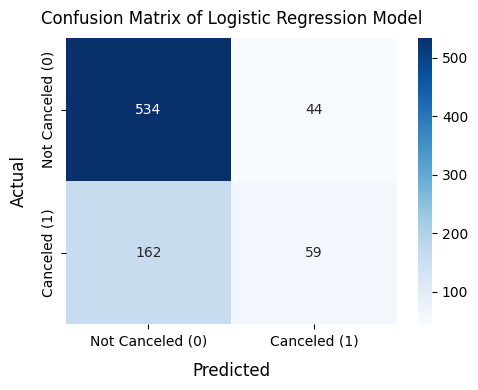

In [51]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled (0)', 'Canceled (1)'],
            yticklabels=['Not Canceled (0)', 'Canceled (1)'])
plt.title("Confusion Matrix of Logistic Regression Model", fontsize=12, pad=10)
plt.xlabel("Predicted", fontsize=12, labelpad=10)
plt.ylabel("Actual", fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()

In [52]:
accuracy = accuracy_score(y_test, y_pred_logistic)
sensitivity = recall_score(y_test, y_pred_logistic)

tn, fp, fn, tp = cm_logistic.ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

precision = precision_score(y_test, y_pred_logistic)
balanced_accuracy = (sensitivity + specificity) / 2

print(f"The model's accuracy rate is {accuracy:.2%}.")
print(f"The model's sensitivity rate is {sensitivity:.2%}")
print(f"The model's specificity rate is {specificity:.2%}")
print(f"The model's precision is {precision:.2%}")
print(f"The model's balanced accuracy is {balanced_accuracy:.2%}")

The model's accuracy rate is 74.22%.
The model's sensitivity rate is 26.70%
The model's specificity rate is 92.39%
The model's precision is 57.28%
The model's balanced accuracy is 59.54%


In [53]:
train_accuracy = log_reg.score(X_train_sk, y_train)
test_accuracy = log_reg.score(X_test_sk, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7312
Test Accuracy: 0.7422


### **Address the Imbalance Issue**


To address the class imbalance issue, we applied the `class_weight` parameter in the logistic regression model. This parameter allows us to assign different weights to the classes, which can help improve the model's sensitivity to the minority class (cancellations). By setting `class_weight='balanced'`, we let scikit-learn automatically adjust the weights inversely proportional to class frequencies in the input data.

After retraining the model, the updated confusion matrix revealed the following performance metrics:
- The model's overall accuracy is 66.83%;
- **The sensitivity (true positive rate) is 74.66%**;
- The specificity (true negative rate) is 63.84%;
- The precision is 44.12%;
- The balanced accuracy is 59.32%;
- Training set Accuracy: 67.36%.

**These results highlight a substantial improvement in sensitivity, meaning the model is now much more effective at identifying customers who are likely to cancel.** Although overall accuracy and specificity decreased slightly, this trade-off aligns with Lobster Land management’s objective of prioritizing the detection of potential cancellations. **Moreover, the similar accuracy rates on the training and test sets indicate that the model effectively captures the underlying patterns in the dataset without signs of overfitting.** This balance suggests that the model generalizes well to unseen data while maintaining its predictive reliability. This balance between improved sensitivity and maintained generalizability enhances the model’s practical value in supporting proactive retention strategies.

In [54]:
log_reg_bl = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_bl.fit(X_train_sk, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
y_pred_bl = log_reg_bl.predict(X_test_sk)
cm_logistic_bl = confusion_matrix(y_test, y_pred_bl)

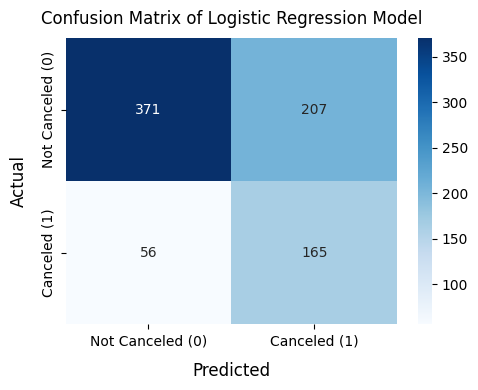

In [56]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm_logistic_bl, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled (0)', 'Canceled (1)'],
            yticklabels=['Not Canceled (0)', 'Canceled (1)'])
plt.title("Confusion Matrix of Logistic Regression Model", fontsize=12, pad=10)
plt.xlabel("Predicted", fontsize=12, labelpad=10)
plt.ylabel("Actual", fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()

In [57]:
accuracy_bl = accuracy_score(y_test, y_pred_bl)
sensitivity_bl = recall_score(y_test, y_pred_bl)

tn, fp, fn, tp = cm_logistic_bl.ravel()
specificity_bl = tn / (tn + fp) if (tn + fp) != 0 else 0

precision_bl = precision_score(y_test, y_pred_bl)
balanced_accuracy_bl = (sensitivity + specificity) / 2

print(f"The model's accuracy rate is {accuracy_bl:.2%}.")
print(f"The model's sensitivity rate is {sensitivity_bl:.2%}")
print(f"The model's specificity rate is {specificity_bl:.2%}")
print(f"The model's precision is {precision_bl:.2%}")
print(f"The model's balanced accuracy is {balanced_accuracy_bl:.2%}")

The model's accuracy rate is 67.08%.
The model's sensitivity rate is 74.66%
The model's specificity rate is 64.19%
The model's precision is 44.35%
The model's balanced accuracy is 59.54%


In [58]:
train_accuracy_bl = log_reg_bl.score(X_train_sk, y_train)
test_accuracy_bl = log_reg_bl.score(X_test_sk, y_test)

print(f"Training Accuracy: {train_accuracy_bl:.4f}")
print(f"Test Accuracy: {test_accuracy_bl:.4f}")

Training Accuracy: 0.6736
Test Accuracy: 0.6708


### **Model Interpretation & Marketing Insights**

In [59]:
coefficients_bl = log_reg_bl.coef_.flatten()

coefficients_df = pd.DataFrame({
    'Feature': X_train_sk.columns,
    'Coefficient': coefficients_bl
})
coefficients_df

,Feature,Coefficient
0,booking_lead_time,-0.002554
1,paid_in_full,-1.160192
2,customer_income,-0.000009
3,cabin_type_Interior,0.443234
4,cabin_type_Oceanview,-0.053288
5,cabin_type_Suite,-0.160285
6,loyalty_status_None,1.524703
7,loyalty_status_Platinum,-0.130781
8,loyalty_status_Silver,0.232213


The coefficients of the input features provide the following insights about the final model's results:
- For each additional day a customer **books in advance**, the likelihood of a cruise booking being canceled **decreases**, holding all other variables constant. *This suggests that passengers who plan their trips early are generally more committed and less likely to change their minds.*
- Customers who have **paid the full amount** for the cruise are **less likely** to cancel their booking compared to those who made partial payments, holding all else constant. *This indicates that passengers who have made a financial commitment to the cruise are more likely to follow through with their bookings.*
- Every **additional dollar in customer income** is associated with a **relative decrease** in the probability of cancellation, holding all other factors constant. *This might reflect that wealthier passengers are less price-sensitive and more likely to commit to their bookings.*
- Compared to customers who booked a Balcony cabin, those booking an **Interior cabin** are **more likely** to cancel, while those booking an **Oceanview cabin** are **less likely** to cancel. *This could be due to different expectations and experiences associated with different cabin types.*
- Compared to customers with Gold loyalty status, customers **without** any loyalty status and those with **Silver** loyalty status are **more likely** to cancel. However, customers with **Platinum** loyalty status are **less likely** to cancel, holding all other factors constant. *This suggests that loyalty programs play a significant role in retention.*

In general, **passengers who book late, make partial payments, have lower loyalty status, book interior cabins, or have lower income levels appear most at risk of cancellation.**

Based on these insights, Lobster Land marketing teams can develop targeted strategies to increase customer commitment and reduce cancellations, such as:
- **Proactive Outreach:** Marketing teams can reach out to passengers with partial payments, particularly those with lower incomes, as they are more likely to cancel. Personalized emails, offering reassurance, payment plans, or flexible cancellation policies, could encourage them to finalize their bookings. These communications could emphasize the benefits of early commitment and offer targeted discounts for early full payments.
- **Targeted Promotions:** Given the impact of cabin type, Lobster Land could target passengers booking Interior cabins with additional perks such as room upgrades or discounts on shore excursions to reduce the likelihood of cancellations. For Oceanview and Balcony cabin customers, Lobster Land can continue promoting their offerings, emphasizing the unique experiences that these cabins provide.
- **Loyalty Program Strengthening:** With loyalty status strongly influencing cancellation behavior, Lobster Land can focus on nurturing their existing loyal customers. Offering targeted incentives for Silver members to upgrade to Gold or Platinum status can help retain high-value passengers. Furthermore, for non-loyalty customers, marketing efforts could center around showcasing the benefits of the loyalty program and encouraging them to join early in their booking process.
- **Customer Segmentation:** The insights on customer income and payment behavior suggest that Lobster Land may benefit from creating distinct marketing campaigns tailored to different income segments. For higher-income passengers, premium services or exclusive offers can be emphasized, while for lower-income passengers, flexible payment options and affordability could be prioritized to reduce cancellations.

## **VI. A/B Testing**

In [60]:
ab_pics.head()

,photo,clicked,time_on_page,num_followup_clicks,rating_of_photo,interest_score,device_type,time_of_day,booked_info_session,shared_email,saved_photo
0,Night Glow,0,13.8,0,8.1,6.76,desktop,afternoon,0,1,0
1,Night Glow,0,18.8,0,7.3,6.42,mobile,morning,0,0,0
2,Night Glow,0,9.9,0,7.8,6.34,mobile,afternoon,0,0,0
3,Night Glow,0,7.9,0,7.4,5.95,desktop,afternoon,0,0,0
4,Night Glow,1,73.0,2,7.4,16.70,mobile,afternoon,0,0,0


In [61]:
ab_pics = ab_pics.dropna()
ab_pics.describe()

,clicked,time_on_page,num_followup_clicks,rating_of_photo,interest_score,booked_info_session,shared_email,saved_photo
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,0.156902,23.081132,0.233366,7.432969,7.805005,0.083416,0.060576,0.103277
std,0.363889,23.576640,0.781342,1.087268,3.530199,0.276648,0.238669,0.304472
min,0.000000,0.500000,0.000000,4.200000,3.670000,0.000000,0.000000,0.000000
25%,0.000000,12.300000,0.000000,6.700000,5.870000,0.000000,0.000000,0.000000
50%,0.000000,15.700000,0.000000,7.500000,6.630000,0.000000,0.000000,0.000000
75%,0.000000,20.100000,0.000000,8.200000,7.445000,0.000000,0.000000,0.000000
max,1.000000,120.100000,6.000000,10.600000,22.630000,1.000000,1.000000,1.000000


### **Click-Through Rate (Initial Engagement)**

In [62]:
ctr = ab_pics.groupby('photo')['clicked'].mean()
ctr

photo
Caribbean Port    0.267442
City Visit        0.086066
Night Glow        0.108209
Tropical Beach    0.164557
Name: clicked, dtype: float64

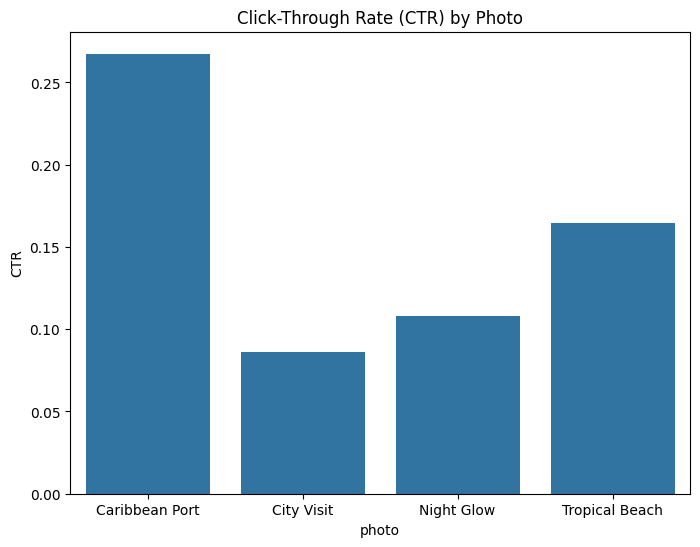

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x=ctr.index, y=ctr.values)
plt.title("Click-Through Rate (CTR) by Photo")
plt.ylabel("CTR")
plt.show()

The Click-Through Rate (CTR) measures how many people clicked on the photo after seeing it. From the bar plot, we can see that Caribbean Port caught the most attention, with an impressive 26.7% CTR, meaning over a quarter of viewers clicked on it. This suggests that the image and its associated content were highly effective in sparking interest right away.

Tropical Beach comes in second with a 16.5% CTR, which is still quite strong. While it didn’t attract as many clicks as Caribbean Port, it still did a good job drawing people in.

On the other hand, Night Glow and City Visit had lower CTRs. Night Glow had a 10.8% CTR, which is decent but not as striking as the top performers. City Visit had the lowest CTR at 8.6%, indicating it struggled to grab people’s attention compared to the other images.

In short, Caribbean Port led in attracting clicks, but Tropical Beach also performed well, showing that it’s capable of generating interest while maintaining a solid engagement level.

### **On-Page Engagement (Time Spent and Follow-up Actions)**
Engagement metrics: Average time spent on page (for users who clicked)

In [64]:
time_on_page_avg = ab_pics[ab_pics['clicked'] == 1].groupby('photo')['time_on_page'].mean()
time_on_page_avg

photo
Caribbean Port    18.047826
City Visit        82.757143
Night Glow        85.131034
Tropical Beach    81.756410
Name: time_on_page, dtype: float64

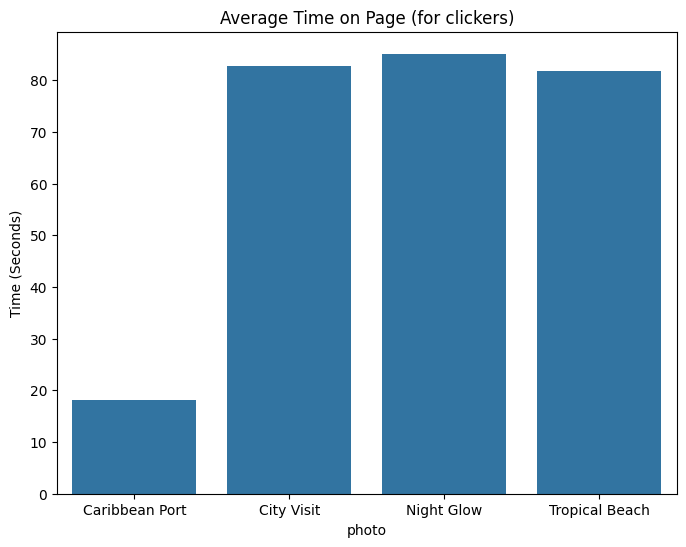

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x=time_on_page_avg.index, y=time_on_page_avg.values)
plt.title("Average Time on Page (for clickers)")
plt.ylabel("Time (Seconds)")
plt.show()

This chart shows the **average time spent on the page** by users who clicked on each photo. The time reflects how engaged users were once they interacted with the content after seeing the photo. Here’s what the results show:

- **Caribbean Port** has the lowest average time on page (~18 seconds), meaning users who clicked this photo spent very little time on the page. This indicates that while it initially grabbed attention, it failed to keep users engaged for long.
  
- **City Visit**, **Night Glow**, and **Tropical Beach** all saw much higher engagement, with users spending between **81 and 85 seconds** on average. These photos kept users on the page for much longer, signaling greater interest in the content after clicking.

This difference highlights a **quality vs. quantity** dynamic. **Caribbean Port** had a strong CTR, but users didn’t stick around, suggesting it may not have delivered as promised once users clicked through. In contrast, **Tropical Beach** and **Night Glow** managed to not only grab attention but also maintain it, suggesting a deeper connection with users. **City Visit**, despite its low CTR, kept a small but highly engaged audience.

In summary, **Caribbean Port** had the highest initial clicks but the lowest engagement, while **Tropical Beach** and **Night Glow** not only attracted clicks but also kept users engaged longer, making them more valuable overall.

### **Average follow-up clicks (for users who clicked)**

In [66]:
followup_clicks_avg = ab_pics[ab_pics['clicked'] == 1].groupby('photo')['num_followup_clicks'].mean()
followup_clicks_avg

photo
Caribbean Port    0.130435
City Visit        2.285714
Night Glow        2.068966
Tropical Beach    1.717949
Name: num_followup_clicks, dtype: float64

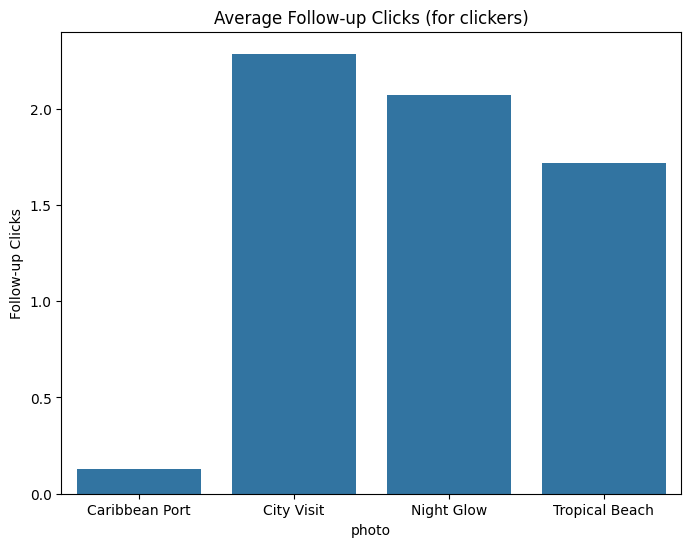

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x=followup_clicks_avg.index, y=followup_clicks_avg.values)
plt.title("Average Follow-up Clicks (for clickers)")
plt.ylabel("Follow-up Clicks")
plt.show()

This chart shows the average number of follow-up clicks for each photo variant, but only for users who clicked on the photo in the first place. Follow-up clicks represent additional interactions on the landing page after the initial click, which indicates deeper engagement with the content.

City Visit stands out with the highest average follow-up clicks (~2.29), meaning users who clicked on this photo were highly engaged and explored more content after their initial click. This suggests that while City Visit didn’t attract as many clicks (as seen in the previous chart), those who did click were particularly interested in learning more.

Night Glow and Tropical Beach users also showed good engagement, with 1.72 and 2.07 follow-up clicks on average, respectively. These values are relatively close to each other, suggesting that users found both photos engaging, though they weren’t as likely to explore as much as those who clicked City Visit.

Caribbean Port had the lowest follow-up clicks (~0.13), meaning that even among those who clicked on it, very few interacted further with the content. This low follow-up engagement aligns with the previous finding that users spent minimal time on the page after clicking the photo.

In summary, City Visit drove the most in-depth exploration by users, while Caribbean Port captured clicks but failed to sustain engagement. Night Glow and Tropical Beach also performed well, though they didn’t spark as much follow-up interaction as City Visit.

### **User Perception: Photo Ratings and Interest Scores**
**Average rating for each photo out of 10**

In [68]:
rating_avg = ab_pics.groupby('photo')['rating_of_photo'].mean()
rating_avg

photo
Caribbean Port    7.540698
City Visit        6.227459
Night Glow        7.858582
Tropical Beach    8.075527
Name: rating_of_photo, dtype: float64

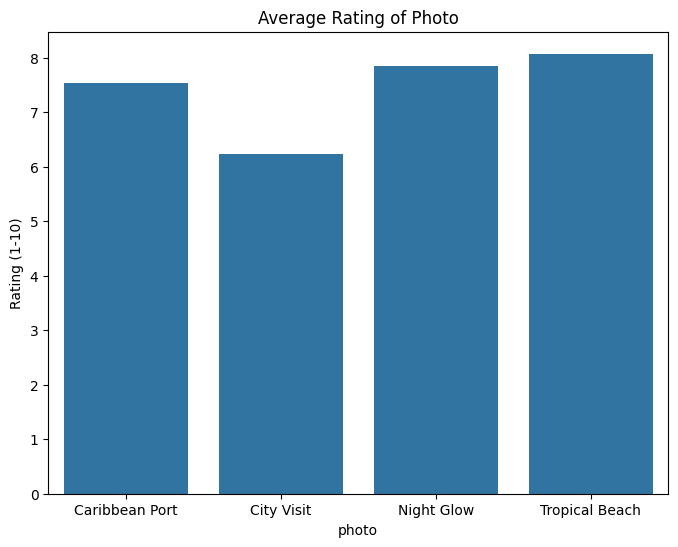

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x=rating_avg.index, y=rating_avg.values)
plt.title("Average Rating of Photo")
plt.ylabel("Rating (1-10)")
plt.show()

This chart shows the **average rating** of each photo, based on a 1–10 scale where higher ratings indicate greater user preference.

- **Tropical Beach** stands out as the top-rated photo, with an **average rating of 8.1/10**. This indicates that users found this photo the most appealing overall.
  
- **Night Glow** follows closely with a **rating of 7.86/10**, showing that users also liked this photo quite a bit, though it didn’t quite reach the same level of appeal as **Tropical Beach**.

- **Caribbean Port** had a **solid rating of 7.54/10**, meaning users liked it but not as much as the top two. It had a positive reception, but its rating was lower compared to **Tropical Beach** and **Night Glow**.

- **City Visit** received the lowest rating at **6.23/10**, indicating that this photo was not as well-liked as the others. This suggests that users didn’t connect as strongly with the theme or visual of this photo.

In summary, **Tropical Beach** was the most popular photo in terms of user ratings, followed by **Night Glow**. **Caribbean Port** and **City Visit** received more moderate ratings, with **City Visit** being the least favored. This reinforces the idea that **Tropical Beach** resonated the most with users visually.

**Average interest score for each photo**

In [70]:
interest_score_avg = ab_pics.groupby('photo')['interest_score'].mean()
interest_score_avg

photo
Caribbean Port    8.441124
City Visit        6.383443
Night Glow        7.845224
Tropical Beach    8.530591
Name: interest_score, dtype: float64

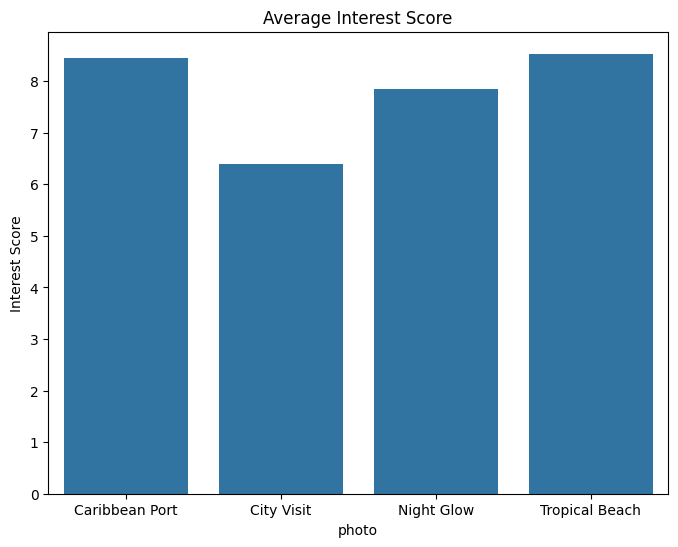

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x=interest_score_avg.index, y=interest_score_avg.values)
plt.title("Average Interest Score")
plt.ylabel("Interest Score")
plt.show()

This chart shows the **average interest score** for each photo, which is a composite metric that combines various factors like click-through rate, time spent on the page, follow-up clicks, and ratings to measure overall user engagement.

- **Tropical Beach** leads with the highest average interest score (**8.53**), indicating that this photo not only attracted clicks but also generated significant interest from the users who engaged with it. This suggests that the photo resonated well with users, leading to both high interaction and deeper engagement.

- **Caribbean Port** also performed well with an average interest score of **8.44**, which is quite close to **Tropical Beach**. This shows that although **Caribbean Port** had the highest initial CTR, users who interacted with it found it appealing and relevant.

- **Night Glow** followed with an average interest score of **7.85**, indicating strong engagement, but slightly less than **Caribbean Port** and **Tropical Beach**. It still shows that users who clicked on **Night Glow** were quite interested, though not as much as those who interacted with the other two.

- **City Visit** has the lowest interest score (**6.38**), showing that this photo failed to spark as much interest compared to the others. Despite some users clicking on it, the photo didn’t seem to engage them as deeply as the others did.

In summary, **Tropical Beach** and **Caribbean Port** led in generating interest, with **City Visit** trailing behind in user engagement. This reinforces the idea that **Tropical Beach** and **Caribbean Port** are the most appealing to users in terms of both initial attraction and sustained interest.